In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [58]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df['sex']=df['sex'].replace({'female':1,'male':2})
df['smoker']=df['smoker'].replace({'yes':1,'no':2})
df['region']=df['region'].replace({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [61]:
X=df.drop(columns=['charges'])
y=df['charges']

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 1)

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
sc = StandardScaler()

In [100]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled =sc.transform(X_test)

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [102]:
from sklearn.preprocessing import PolynomialFeatures

In [103]:
poly = PolynomialFeatures(degree=3)

In [104]:
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [105]:
poly.fit(X_train_poly,y_train)
lr.fit(X_train_poly,y_train)

LinearRegression()

In [106]:
y_test_pred = lr.predict(X_test_poly)
y_test_pred

array([ 3118., 12592., 10880., 12708.,   316., 34268., 11212., 11346.,
        3600., 24700., 14374., 11110.,  7618.,  7168.,  2620.,  8984.,
        4960.,  5972., 14546., 14332., 10936., 42748.,  8778., 10068.,
        4190.,  8320.,  9904.,  9260.,  5206.,  4128., 12572.,  3304.,
       19164., 25820., 26076., 11424., 37020., 17756., 12766., 32892.,
        5890., 12864., 12944., 13544.,  4510., 12648.,  4482., 28700.,
       13146., 14640., 14304., 12884.,  2608.,  9128., 24412.,  4180.,
       36316., 13616.,  9284.,  3464.,  3414., 13520., 24764.,  2960.,
       13624., 10764., 12790., 13670.,  6492., 14844., 40604., 44732.,
        1752., 14078., 14144., 41244.,  4848.,  3656., 12794., 12064.,
        9856., 14700., 12328.,  2568., 37148., 46748.,  7222., 52988.,
       12956.,  9558., 25948., 21084., 19626., 10204.,  1768., 11600.,
       10266., 14840., 12922.,  8912., 12584., 16156., 15196., 31836.,
       24732., 22876.,  2136.,  7648.,  4784., 11276.,  5150.,  5872.,
      

In [107]:
from sklearn.metrics import mean_absolute_error

In [108]:
mean_absolute_error(y_test_pred,y_test)

2946.1505904477613

In [109]:
y_train_pred = lr.predict(X_train_poly)

In [110]:
mean_absolute_error(y_train_pred,y_train)

2718.742830647132

ValueError: x and y must be the same size

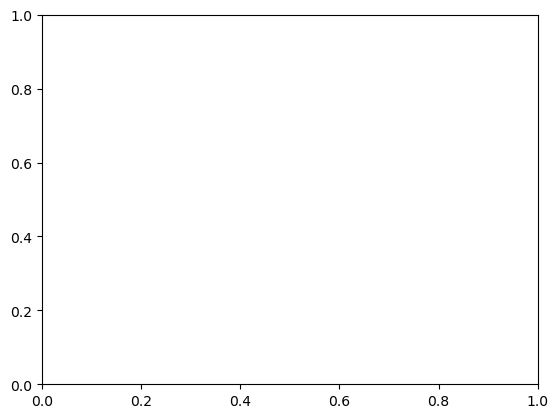

In [119]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_test_scaled,y_test_pred,color='red')

In [113]:
print(X_train_poly.shape)
print(y_train.shape)

(802, 84)
(802,)


In [120]:
print(X_train_scaled.shape)
print(y_train.shape)

(802, 6)
(802,)
